# EDA Deep Dive

1. Import necessary libraries and load data
2. Univariate data analysis
3. Data distribution
4. Multivariate data analysis
5. Encoding categorical variables
   * One-hot encoding
   * Label encoding
6. Normalization and scaling

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Disable warnings about mixed data types for this dataset
import warnings
warnings.filterwarnings('ignore')

import PIL as image

## Univariate analysis

In [11]:
data = pd.read_csv('Melbourne_housing_FULL.csv')
data = data['Distance'] # limiting to a single column for univariate analysis

In [12]:
len(data) # how many records?

34857

In [13]:
data.isnull().sum() # are there missing values?

1

In [14]:
data = data.dropna() # drop missing values

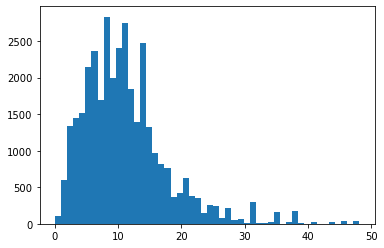

In [15]:
plt.hist(data, bins=50);

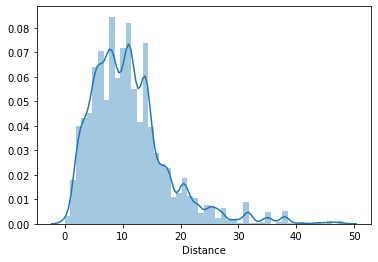

In [17]:
sns.distplot(data);

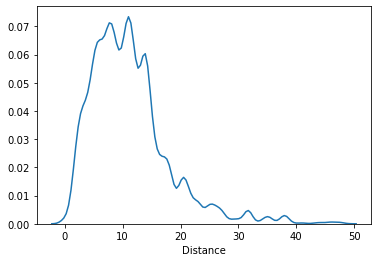

In [18]:
sns.distplot(data, hist=False);

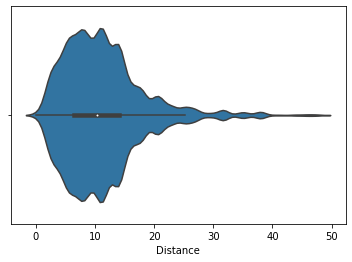

In [19]:
sns.violinplot(data); # same as distplot but duplicated across the x axis

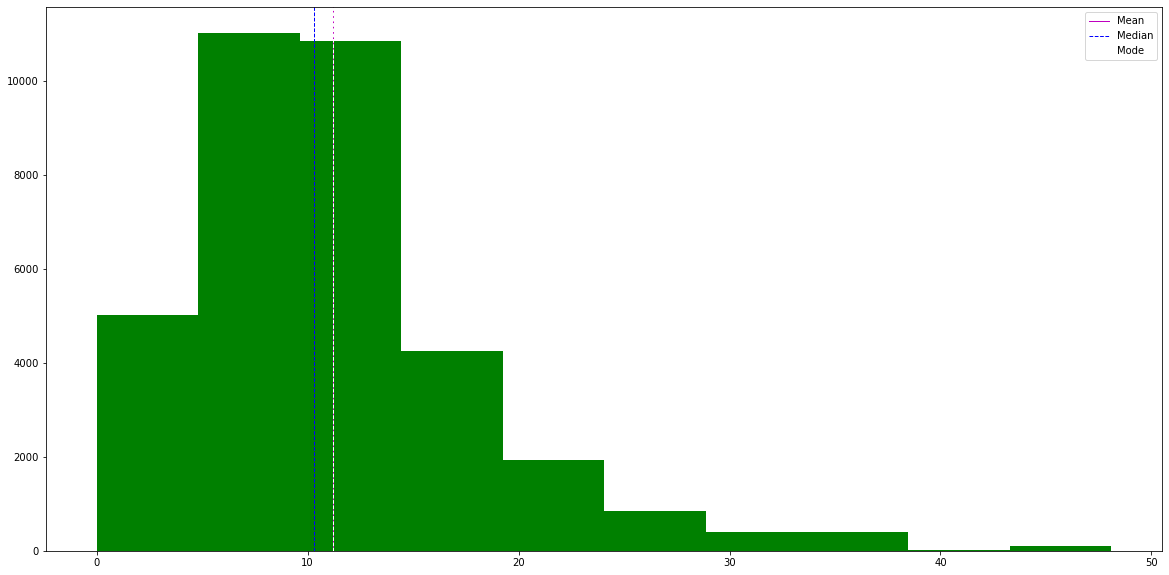

In [22]:
plt.figure(figsize=(20,10))
plt.hist(data,color='g')
plt.axvline(data.mean(),color='m',linewidth=1,label='Mean')
plt.axvline(data.median(),color='b',linestyle='dashed',linewidth=1,label='Median')
plt.axvline(data.mode()[0],color='w',linestyle='dashed',linewidth=1,label='Mode')
plt.legend()

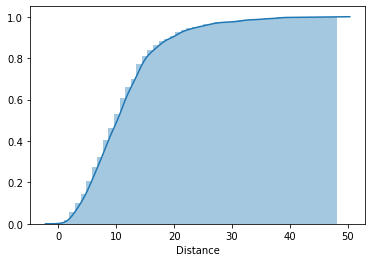

In [23]:
sns.distplot(data, hist_kws=dict(cumulative=True), kde_kws=dict(cumulative=True));

## Multivariate analysis

In [25]:
data = pd.read_csv('Melbourne_housing_FULL.csv')
data.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,inf,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN


In [26]:
data = data.dropna() # drop empty values

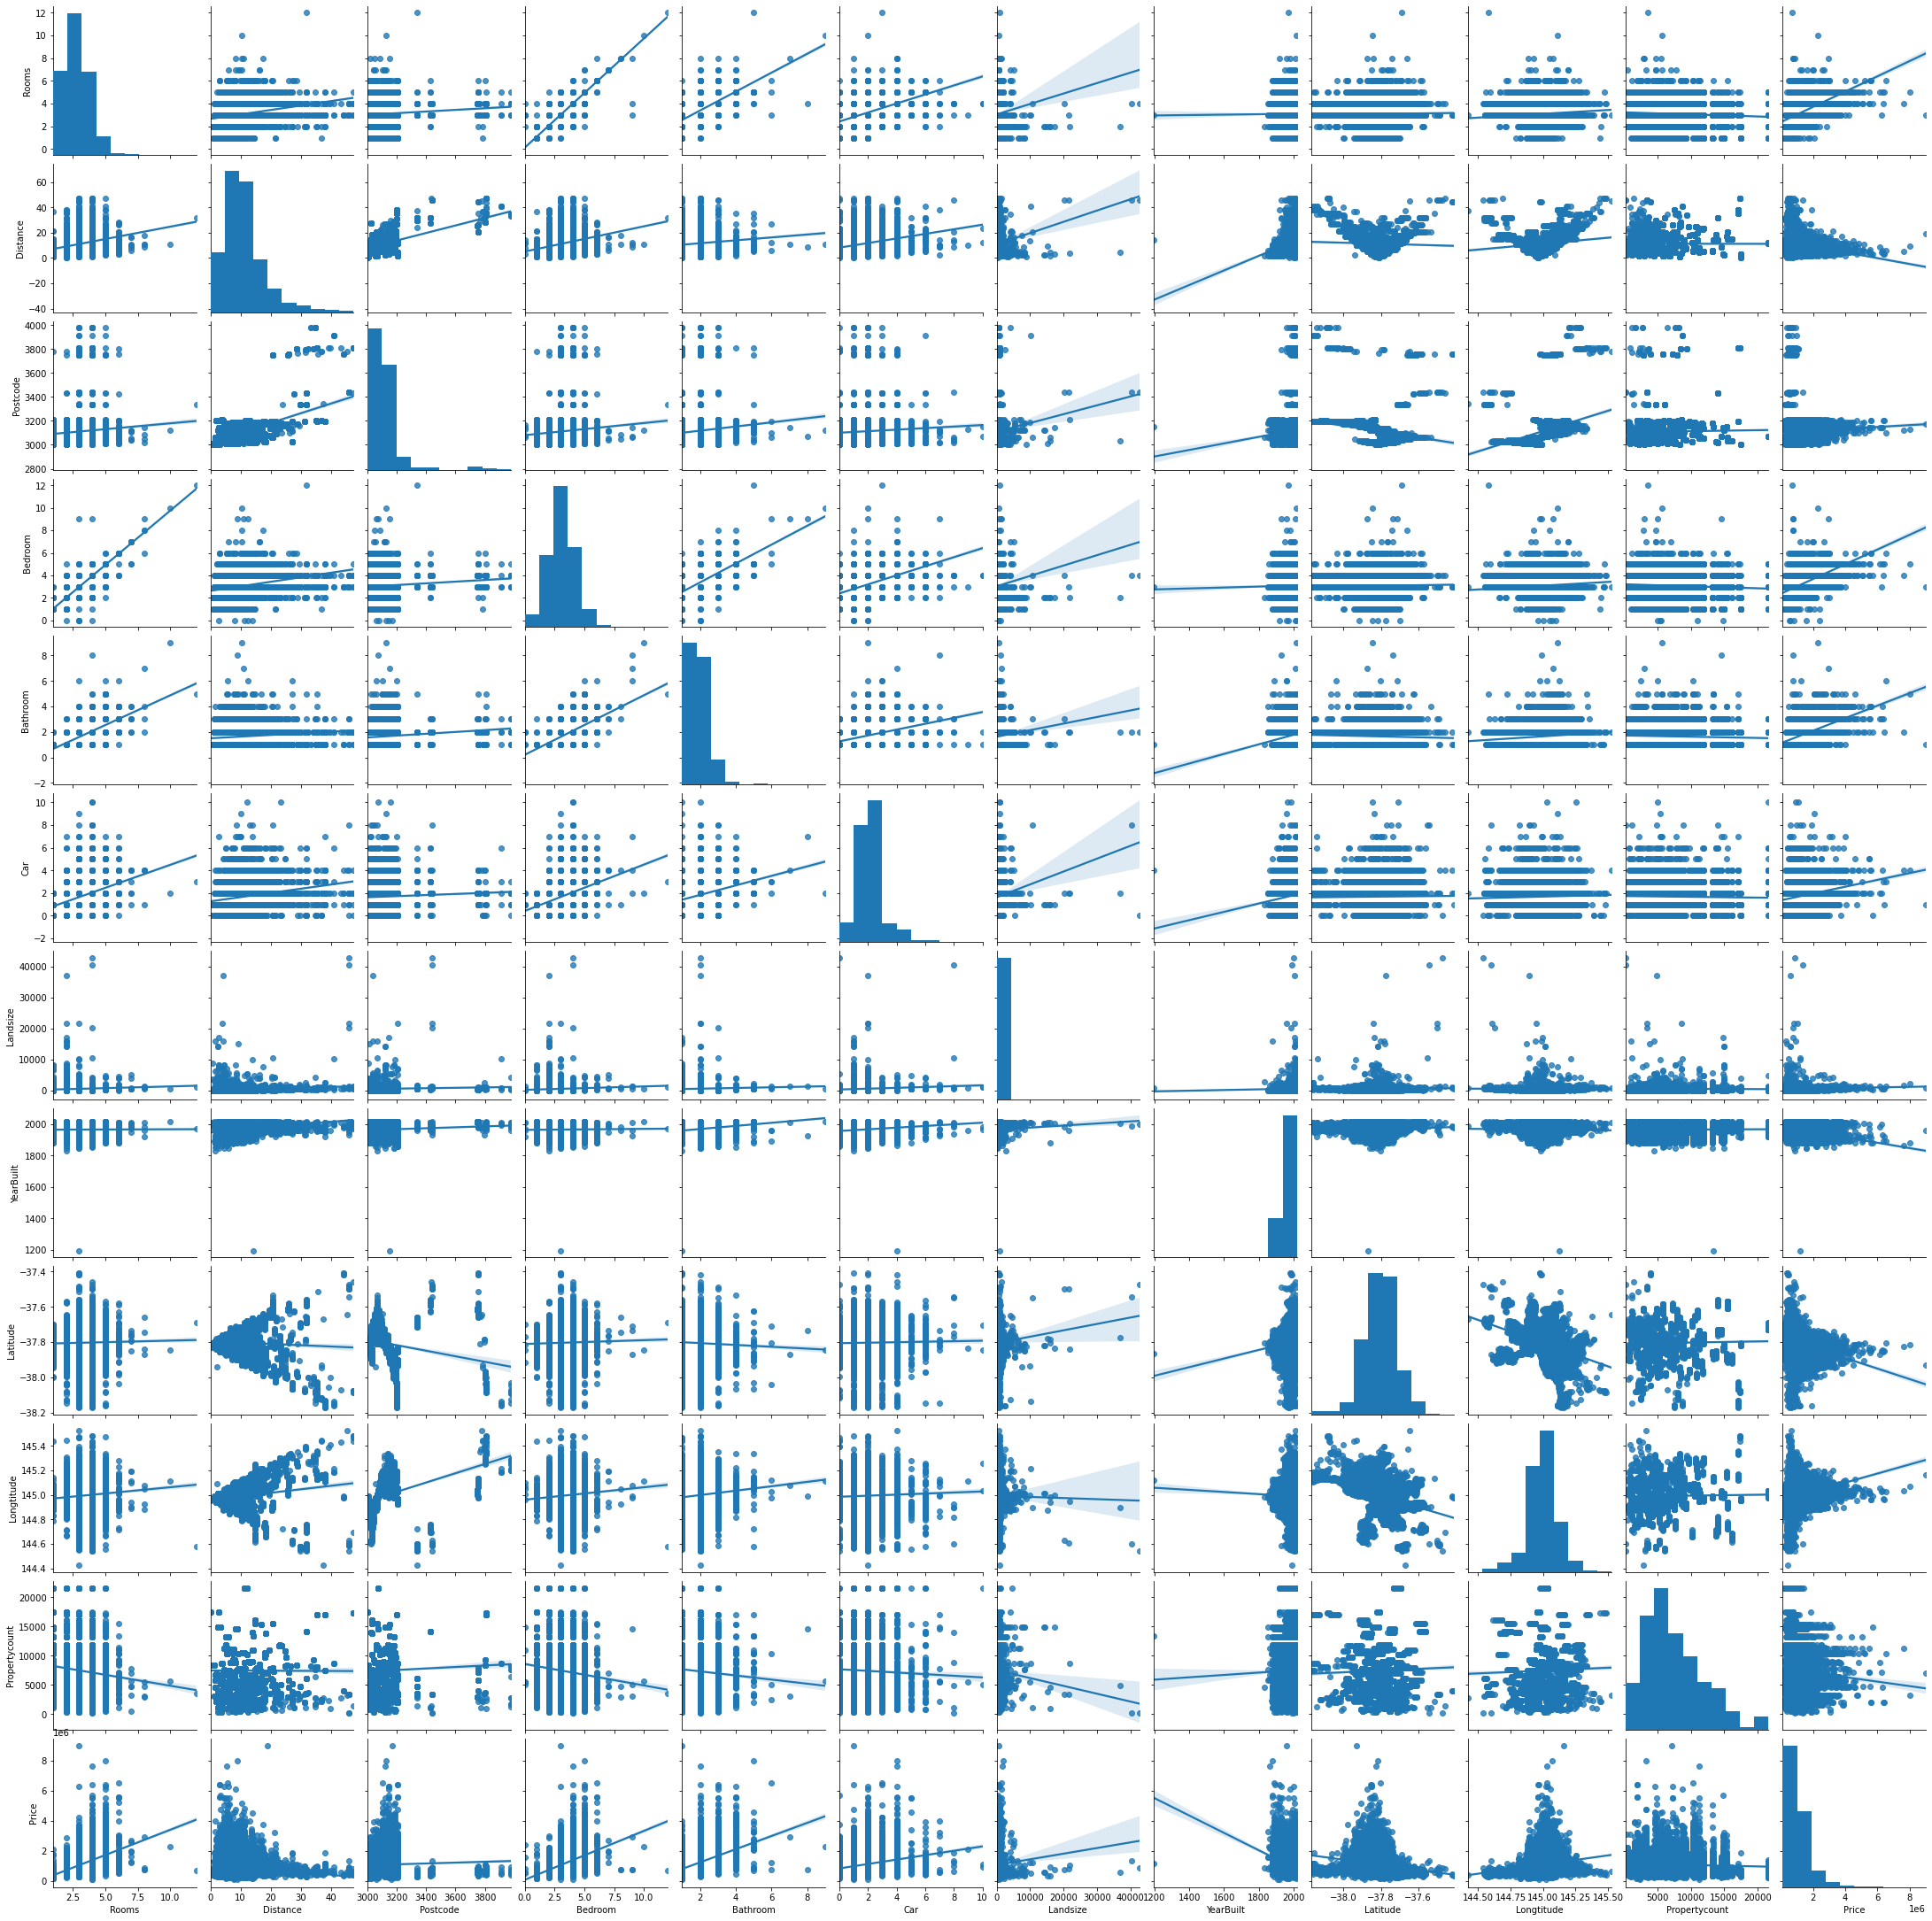

In [28]:
sns.pairplot(data, kind="reg");

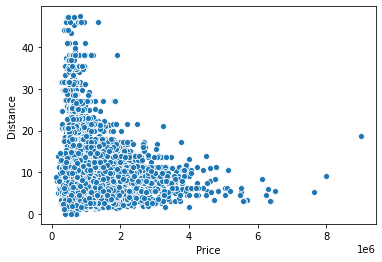

In [29]:
sns.scatterplot(data['Price'], data['Distance']);

In [30]:
data.corr()

,Rooms,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,YearBuilt,Latitude,Longtitude,Propertycount,Price
Rooms,1.000000,0.276490,0.084078,0.964475,0.624138,0.401395,0.101178,0.006944,0.019001,0.082831,-0.082604,0.475096
Distance,0.276490,1.000000,0.489550,0.283365,0.122035,0.259328,0.138568,0.313238,-0.055374,0.163922,-0.003173,-0.231222
Postcode,0.084078,0.489550,1.000000,0.087130,0.111470,0.055520,0.069603,0.089862,-0.195195,0.358014,0.032741,0.045962
Bedroom,0.964475,0.283365,0.087130,1.000000,0.626560,0.405543,0.101054,0.016320,0.022983,0.082491,-0.081207,0.460906
Bathroom,0.624138,0.122035,0.111470,0.626560,1.000000,0.310975,0.075939,0.192965,-0.041642,0.109141,-0.058255,0.463524
Car,0.401395,0.259328,0.055520,0.405543,0.310975,1.000000,0.123466,0.139322,0.015157,0.035530,-0.031244,0.209439
Landsize,0.101178,0.138568,0.069603,0.101054,0.075939,0.123466,1.000000,0.037696,0.042509,-0.008211,-0.032504,0.058394
YearBuilt,0.006944,0.313238,0.089862,0.016320,0.192965,0.139322,0.037696,1.000000,0.100042,-0.026872,0.017093,-0.313629
Latitude,0.019001,-0.055374,-0.195195,0.022983,-0.041642,0.015157,0.042509,0.100042,1.000000,-0.345845,0.029863,-0.224117
Longtitude,0.082831,0.163922,0.358014,0.082491,0.109141,0.035530,-0.008211,-0.026872,-0.345845,1.000000,0.026186,0.212117


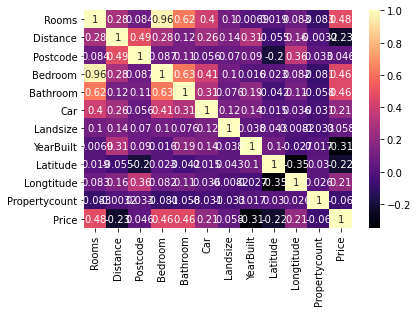

In [33]:
sns.heatmap(data.corr(), annot=True, cmap='magma');

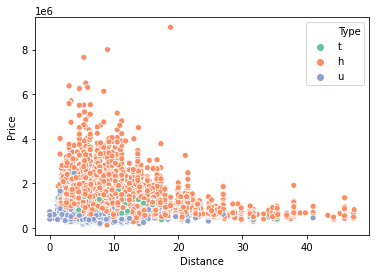

In [34]:
sns.scatterplot(data['Distance'], data['Price'], hue=data['Type'], palette='Set2');